In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
musica = pd.read_excel('top10s.xlsx')

del musica['title']
del musica['artist']
del musica['top genre']

data = pd.DataFrame(musica)

data

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,2010,97,89,67,-4,8,80,217,19,4,83
1,2,2010,87,93,75,-5,52,64,263,24,23,82
2,3,2010,120,84,76,-3,29,71,200,10,14,80
3,4,2010,119,92,70,-4,8,71,295,0,4,79
4,5,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2019,104,66,61,-7,20,16,176,1,3,75
598,599,2019,95,79,75,-6,7,61,206,21,12,75
599,600,2019,136,76,53,-5,9,65,260,7,34,70
600,601,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
def regress(y,x):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

In [4]:
data.describe()

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,301.500000,2014.586379,118.568106,70.478405,64.370432,-5.579734,17.800664,52.157807,224.687708,14.347176,8.355482,66.501661
std,173.926709,2.605513,24.809816,16.311966,13.387878,2.800247,13.097616,22.470169,34.157005,20.777341,7.489085,14.522259
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.250000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,301.500000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,451.750000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,602.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [5]:
data.isnull().sum()

Num      0
year     0
bpm      0
nrgy     0
dnce     0
dB       0
live     0
val      0
dur      0
acous    0
spch     0
pop      0
dtype: int64

In [6]:
#sns.pairplot(data, height=1.5);

In [7]:
x = data['pop']
y = data[['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','Num']]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
y, x, test_size=0.33, random_state=42)

results = regress(y_train,x_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     26.28
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           9.36e-41
Time:                        13:57:32   Log-Likelihood:                -1532.8
No. Observations:                 403   AIC:                             3090.
Df Residuals:                     391   BIC:                             3138.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.611e+04   2908.696    -15.854      0.000   -5.18e+04   -4.04e+04
year          22.9768      1.447     15.879      0.000      20.132      25.822
bpm           -0.0171      0.023     -0.757      0.450      -0.062       0.027
nrgy          -0.0673      0.057     -1.184      0.237      -0.179       0.044
dnce           0.0343      0.049      0.698      0.485      -0.062       0.131
dB             0.4752      0.446      1.066      0.287      -0.401       1.351
live          -0.0163      0.042     -0.387      0.699      -0.099       0.066
val            0.0139      0.032      0.429      0.668      -0.050       0.078
dur           -0.0083      0.018     -0.468      0.640      -0.043       0.026
acous         -0.0345      0.034     -1.012      0.312      -0.101       0.033
spch          -0.0226      0.074     -0.305      0.761      -0.169       0.123
Num           -0.3267      0.022    -15.087      0.000      -0.369      -0.284
==============================================================================
Omnibus:                      158.960   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.433
Skew:                          -1.595   Prob(JB):                    3.97e-192
Kurtosis:                       9.505   Cond. No.                     1.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df = data[['year','Num']]

df_train, df_test = train_test_split(
df, test_size=0.33, random_state=42)

resultados = regress(y_train,df_train)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.23e-47
Time:                        13:57:32   Log-Likelihood:                -1536.1
No. Observations:                 403   AIC:                             3078.
Df Residuals:                     400   BIC:                             3090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.661e+04   2866.762    -16.257      0.000   -5.22e+04    -4.1e+04
year          23.2161      1.426     16.279      0.000      20.412      26.020
Num           -0.3292      0.021    -15.430      0.000      -0.371      -0.287
==============================================================================
Omnibus:                      159.373   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.915
Skew:                          -1.607   Prob(JB):                    2.08e-189
Kurtosis:                       9.436   Cond. No.                     1.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
beta0 = resultados.params[0]  
beta1 = resultados.params[1]  
beta2 = resultados.params[2]

In [11]:
def f(feature1, feature2):
    return beta0 + beta1*feature1 + beta2*feature2

In [12]:
npoints = 100
feature1 = df["year"]
feature2 = df["Num"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [13]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [14]:
fit_z = f(eixo_x, eixo_y)

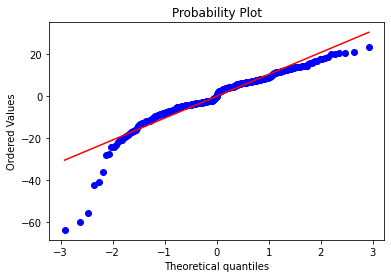

In [15]:
stats.probplot(resultados.resid,dist='norm',plot=plt);

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

results_teste = regress(y_train,x_train)
y_pred = results_teste.predict(sm.add_constant(x_train))
erro = mean_squared_error(y_train,y_pred)
erro2 = mean_absolute_error(y_train,y_pred)
print(erro,erro2)

117.82451502206449 7.969445448115685


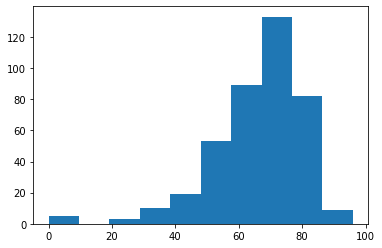

In [17]:
plt.hist(y_train);

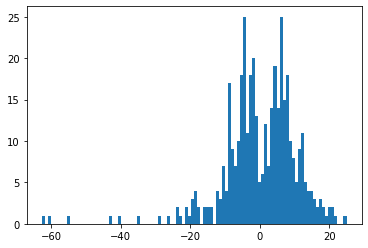

In [18]:
plt.hist(y_train - y_pred, bins = 100);

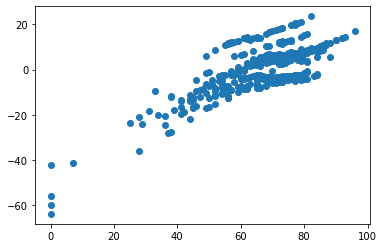

In [19]:
plt.scatter(y_train,resultados.resid);

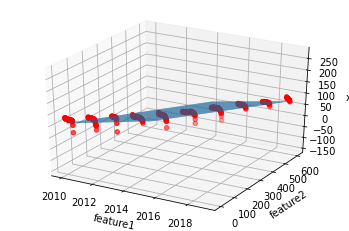

In [20]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, x, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("x")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 400, random_state = 0) 
regressor.fit(y_train,x_train)   
y_pred = regressor.predict(x_train)
erro = mean_squared_error(y_train,y_pred)
erro2 = mean_absolute_error(y_train,y_pred)
print(erro,erro2)

ValueError: Expected 2D array, got 1D array instead:
array=[77. 71. 50. 78. 60. 71. 75. 62. 75. 61. 86. 67. 67. 76. 74. 45. 81. 58.
 77. 82. 69. 68. 80. 76. 72. 60. 80. 66. 69. 33. 54. 65. 87. 77. 62. 70.
 57. 63. 44. 66. 79. 84. 78. 65. 75. 68. 69. 82. 84. 67. 62. 75. 65. 68.
 65. 72. 76. 66. 73. 70. 72. 56. 70. 93. 57. 67. 78. 83. 50. 62. 62. 64.
 69. 77. 55. 71. 73. 72. 71. 49. 88. 66. 79. 81. 34.  0. 46. 71. 72. 64.
 54. 37.  0. 71. 59. 74. 66. 92. 67. 54. 41. 54. 57. 90. 84. 72. 67. 70.
 81. 72. 54. 75. 53. 52. 67. 61.  7. 73. 68. 57. 90. 72. 72. 66. 69. 36.
 61. 47. 55. 68. 76. 78. 61. 88. 56. 70. 72. 75. 76. 84. 45. 38. 59. 72.
 76. 28. 82. 76. 59. 47. 69. 52. 44. 78. 83. 76. 77. 58. 52. 65. 84. 71.
 51. 46. 80. 65. 53. 38. 65. 79. 73. 70. 72. 60. 45. 66. 62. 84. 81. 70.
 54. 77. 73. 69. 86. 73. 55. 79. 77. 66. 72. 72. 66. 71. 72. 68. 69. 74.
 87. 73. 54. 76. 63. 76. 63. 57. 69. 81. 79. 68. 76. 79. 68. 69. 68. 71.
 67. 54. 65. 52. 73. 50. 68. 74. 72. 44. 79. 76. 73. 45. 78. 52. 68. 81.
 77. 67. 56. 79. 41. 85. 61. 29. 59. 56. 69. 73. 77. 61. 65. 60. 65. 73.
 73. 61. 63. 69. 81. 66. 76. 57. 75. 72. 49. 81. 65. 68. 49. 83. 65. 77.
 78. 57. 66. 81. 41. 72. 77. 39. 71. 56. 78. 78. 52. 57. 76. 48. 28. 72.
 82. 70. 96. 79. 36. 68. 38. 74. 78. 74. 66. 52. 62. 61.  0. 65. 50. 59.
 63. 80. 44. 70. 64. 49. 78. 76. 58. 72. 55.  0. 73. 72. 67. 86. 82. 73.
 72. 74. 58. 59. 78. 59. 78. 80. 60. 73. 59. 76. 78. 70. 84. 46. 72. 70.
 71. 79. 73. 82. 64. 64. 42. 62. 86. 51. 78. 81. 58. 56. 52. 65. 73. 68.
 74. 81. 70. 76. 69. 84. 49. 65. 57. 64. 57. 71. 85. 76. 71. 64. 56. 66.
 68. 77. 73. 80. 56. 75. 64. 62. 54. 69. 65. 31. 80. 60. 78. 63. 79. 75.
 72. 68. 69. 79. 84. 41. 25.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.